In [1]:
import os
import sys
sys.path.append("D:\Program Files\Tinysoft\Analyse.NET")
import TSLPy3 #导入模块
TSLPy3.DefaultConnectAndLogin("test") #调用函数登陆
import datetime
import pandas as pd
import numpy as np 
import matplotlib.mlab as mlab    
import matplotlib.pyplot as plt 

In [2]:
%matplotlib inline

## 各板块涨幅

In [3]:
bklist = ('上证A股','深证A股','创业板','中证500','沪深300','上证50')
youchoose = '上证A股'
t = TSLPy3.EncodeDate(datetime.datetime.today().timetuple()[0],datetime.datetime.today().timetuple()[1],datetime.datetime.today().timetuple()[2])
poolinfo = TSLPy3.RemoteCallFunc("cc",[t],{})

In [4]:
poolinfo[1]

{b'\xb4\xb4\xd2\xb5\xb0\xe5': {b'-10:-8': 6,
  b'-3:0': 430,
  b'-5:-3': 31,
  b'-8:-5': 12,
  b'0:3': 212,
  b'3:5': 15,
  b'5:8': 8,
  b'8:10': 3},
 b'\xbb\xa6\xc9\xee300': {b'-10:-8': 1,
  b'-3:0': 186,
  b'-5:-3': 21,
  b'-8:-5': 4,
  b'0:3': 80,
  b'3:5': 7,
  b'5:8': 4,
  b'8:10': 0},
 b'\xc9\xcf\xd6\xa450': {b'-10:-8': 0,
  b'-3:0': 35,
  b'-5:-3': 5,
  b'-8:-5': 0,
  b'0:3': 10,
  b'3:5': 0,
  b'5:8': 0,
  b'8:10': 0},
 b'\xc9\xcf\xd6\xa4A\xb9\xc9': {b'-10:-8': 3,
  b'-3:0': 847,
  b'-5:-3': 66,
  b'-8:-5': 17,
  b'0:3': 427,
  b'3:5': 35,
  b'5:8': 14,
  b'8:10': 12},
 b'\xc9\xee\xd6\xa4A\xb9\xc9': {b'-10:-8': 3,
  b'-3:0': 259,
  b'-5:-3': 20,
  b'-8:-5': 0,
  b'0:3': 160,
  b'3:5': 20,
  b'5:8': 7,
  b'8:10': 4},
 b'\xd6\xd0\xd6\xa4500': {b'-10:-8': 3,
  b'-3:0': 317,
  b'-5:-3': 26,
  b'-8:-5': 9,
  b'0:3': 142,
  b'3:5': 11,
  b'5:8': 5,
  b'8:10': 2}}

In [5]:
pool = poolinfo[1]
pool

{b'\xb4\xb4\xd2\xb5\xb0\xe5': {b'-10:-8': 6,
  b'-3:0': 430,
  b'-5:-3': 31,
  b'-8:-5': 12,
  b'0:3': 212,
  b'3:5': 15,
  b'5:8': 8,
  b'8:10': 3},
 b'\xbb\xa6\xc9\xee300': {b'-10:-8': 1,
  b'-3:0': 186,
  b'-5:-3': 21,
  b'-8:-5': 4,
  b'0:3': 80,
  b'3:5': 7,
  b'5:8': 4,
  b'8:10': 0},
 b'\xc9\xcf\xd6\xa450': {b'-10:-8': 0,
  b'-3:0': 35,
  b'-5:-3': 5,
  b'-8:-5': 0,
  b'0:3': 10,
  b'3:5': 0,
  b'5:8': 0,
  b'8:10': 0},
 b'\xc9\xcf\xd6\xa4A\xb9\xc9': {b'-10:-8': 3,
  b'-3:0': 847,
  b'-5:-3': 66,
  b'-8:-5': 17,
  b'0:3': 427,
  b'3:5': 35,
  b'5:8': 14,
  b'8:10': 12},
 b'\xc9\xee\xd6\xa4A\xb9\xc9': {b'-10:-8': 3,
  b'-3:0': 259,
  b'-5:-3': 20,
  b'-8:-5': 0,
  b'0:3': 160,
  b'3:5': 20,
  b'5:8': 7,
  b'8:10': 4},
 b'\xd6\xd0\xd6\xa4500': {b'-10:-8': 3,
  b'-3:0': 317,
  b'-5:-3': 26,
  b'-8:-5': 9,
  b'0:3': 142,
  b'3:5': 11,
  b'5:8': 5,
  b'8:10': 2}}

In [6]:
mydict = {}
for key in pool.keys():
    thiskey = key.decode('gbk')
    #if thiskey == youchoose:
    #    mydict = pool[key]
    tempdic = {}
    for kkey in pool[key].keys():
        tempdic[kkey.decode('gbk')] = pool[key][kkey]
    mydict[thiskey] = tempdic
mydict        

{'上证50': {'-10:-8': 0,
  '-3:0': 35,
  '-5:-3': 5,
  '-8:-5': 0,
  '0:3': 10,
  '3:5': 0,
  '5:8': 0,
  '8:10': 0},
 '上证A股': {'-10:-8': 3,
  '-3:0': 847,
  '-5:-3': 66,
  '-8:-5': 17,
  '0:3': 427,
  '3:5': 35,
  '5:8': 14,
  '8:10': 12},
 '中证500': {'-10:-8': 3,
  '-3:0': 317,
  '-5:-3': 26,
  '-8:-5': 9,
  '0:3': 142,
  '3:5': 11,
  '5:8': 5,
  '8:10': 2},
 '创业板': {'-10:-8': 6,
  '-3:0': 430,
  '-5:-3': 31,
  '-8:-5': 12,
  '0:3': 212,
  '3:5': 15,
  '5:8': 8,
  '8:10': 3},
 '沪深300': {'-10:-8': 1,
  '-3:0': 186,
  '-5:-3': 21,
  '-8:-5': 4,
  '0:3': 80,
  '3:5': 7,
  '5:8': 4,
  '8:10': 0},
 '深证A股': {'-10:-8': 3,
  '-3:0': 259,
  '-5:-3': 20,
  '-8:-5': 0,
  '0:3': 160,
  '3:5': 20,
  '5:8': 7,
  '8:10': 4}}

In [7]:
def dictInTime(dic):
    liZF = ['-10:-8','-8:-5','-5:-3','-3:0','0:3','3:5','5:8','8:10']
    #print(liZF)
    liNum = []
    for i in liZF:
        #print(type(dic[i]))
        posValue = dic[i]
        liNum.append(posValue)
    return np.array([liZF,liNum])
    

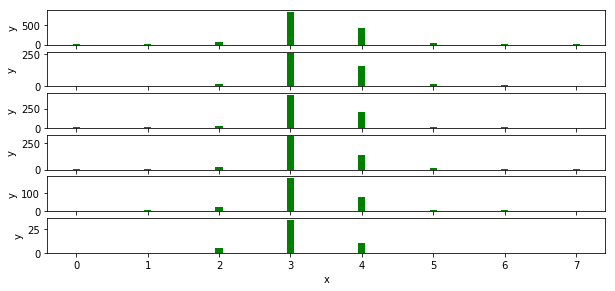

In [30]:
ti = 0
fig = plt.figure(1,figsize=(10.0, 6.0))
for i in bklist:
    #print(i)
    #标准化坐标
    thisbkarr = dictInTime(mydict[i])
    #print(thisbkarr)
    X= [str(val) for val in thisbkarr[0]]
    Y=[int(val) for val in thisbkarr[1]]
    #print(X)
    #print(Y)
    #fig = plt.figure() 
    ax = fig.add_subplot(811+ti)  
    ax.bar(np.arange(8),Y,0.1,color='green')  
#     ax.xlabel("X-axis")  
#     ax.ylabel("Y-axis")  
#     ax.title("bar chart") 
    ax.set_xlabel('x')
    ax.set_ylabel('y')
     
    ti = ti+1
plt.show()

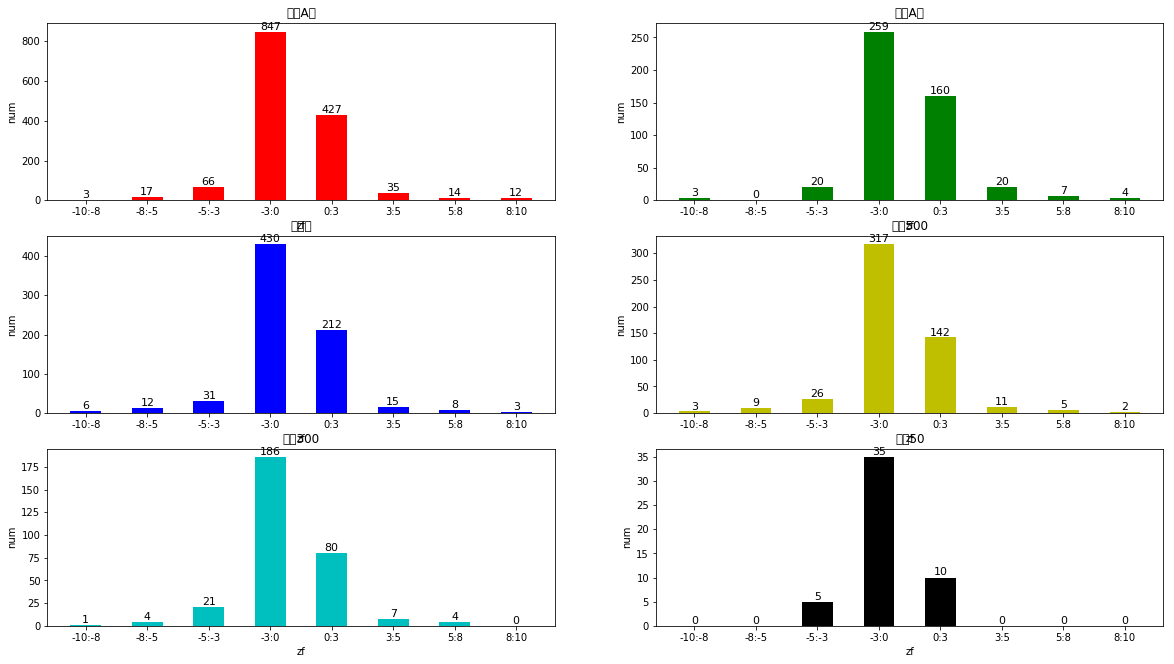

In [59]:
ti = 0
plt.figure(1,figsize=(20,15)) 

for idx,color in enumerate('rgbyck'):
    #print(i)
    #标准化坐标
    thisbkarr = dictInTime(mydict[bklist[idx]])
    #print(thisbkarr)
    X= thisbkarr[0]
    #print(X)
    Y=[int(val) for val in thisbkarr[1]]

    plt.subplot(421+ti)
    plt.bar(np.arange(8),Y,width=0.5,color=color) 
    for a,b in zip(np.arange(8),Y):    
         plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xticks(np.arange(8), X, rotation=0) 
    plt.xlabel('zf') 
    #plt.xticks(X)
    plt.ylabel('num')
    plt.title(bklist[idx])
    #plt.xlim
    ti = ti+1
plt.show()

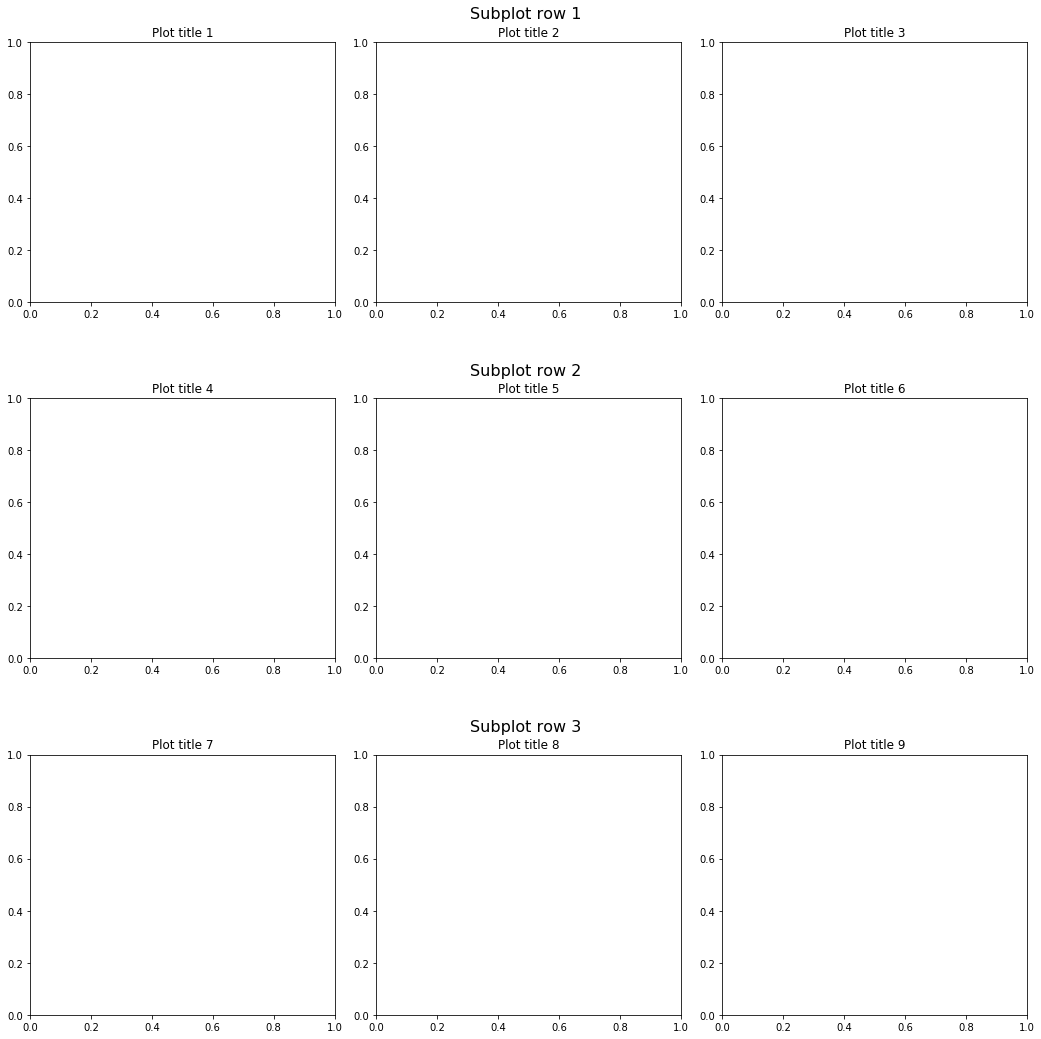

In [24]:
import matplotlib.pyplot as plt

fig, big_axes = plt.subplots(figsize=(15.0, 15.0) , nrows=3, ncols=1, sharey=True) 

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title("Subplot row %s \n" % row, fontsize=16)

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(0,0,0,0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    ax.set_title('Plot title ' + str(i))


fig.set_facecolor('w')
plt.tight_layout()
plt.show()   

In [39]:
e = enumerate('rgbyck')

In [42]:
for idx,color in e :
    print(idx,color)

0 r
1 g
2 b
3 y
4 c
5 k
